<a href="https://colab.research.google.com/github/pripalazzo/Iniciacao_Machine_Learning/blob/main/PyCaret_para_Classifica%C3%A7%C3%A3o_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret para Classificação
jul/2022

## Instalação e configuração da biblioteca

In [64]:
# Importação para vetores / matrizes
# Importação para Google Colab
import numpy as np
import pandas as pd
# from pycaret.utils import enable_colab
# enable_colab()

In [ ]:
# Instalação do PyCaret (para podermos chamar futuramente a classificação)
!pip install pycaret

In [67]:
# Ajuste do markupsafe + junja2 (necessário para PyCaret)
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import jinja2

In [69]:
# Importação do PyCaret - classificação
from pycaret.classification import *

In [70]:
# Importar todas as bases de dados do PyCaret e mostrar por index / task / # instance
from pycaret.datasets import get_data
todas_bases = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [71]:
# Carregar somente a base "Iris" para fazer a classificação das espécies
dataset = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


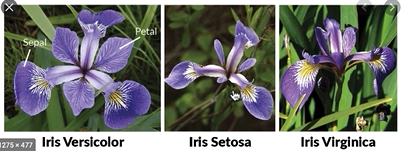

In [ ]:
# Visualizar o tipo de dataset
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# Visualizar o shape / formato dos dados (linha, coluna)
dataset.shape

(150, 5)

In [ ]:
# Verificar as espécies únicas
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Contar quantidade de registros por classe (numpy)
np.unique(dataset['species'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [ ]:
# Montar a base de treinamento / amostra (fração 90%) e teste (fração 10%), random_state = 1 (mesmos registros)
base_treinamento = dataset.sample(frac=0.9, random_state=1)
base_treinamento.shape

(135, 5)

In [ ]:
# Visualizar os registros treinados
base_treinamento.index

Int64Index([ 14,  98,  75,  16, 131,  56, 141,  44,  29, 120,
            ...
             81,  60,   0,   1,  57,  22,  61,  63,   7,  86],
           dtype='int64', length=135)

In [ ]:
# Buscar os registros não sorteadas
base_teste = dataset.drop(base_treinamento.index)
base_teste.shape

(15, 5)

In [ ]:
# Buscar os registros não sorteadas
base_teste.index

Int64Index([20, 25, 37, 50, 68, 71, 72, 79, 96, 101, 129, 133, 134, 137, 140], dtype='int64')

## Configuração do ambiente PyCaret

In [ ]:
# Transformou as espécies em Label Encoded
experimento = setup(data = base_treinamento, target = 'species', session_id=1)

,Description,Value
0,session_id,1
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(135, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Treinamento de vários modelos com validação cruzada

- Validação cruzada: https://www.youtube.com/watch?v=tAohrE-ot28

In [ ]:
# Comparando modelos de ML low-code com PyCaret
from pycaret.classification import compare_models
modelos = compare_models(sort = 'Accuracy', fold = 10)

""


## Tuning dos modelos

In [ ]:
# Criando o modelo a partir do (rf) - Random Forest Classifier	
from pycaret.classification import create_model
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.9656,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print(random_forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [ ]:
from pycaret.classification import tune_model
random_forest_tuning = tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.9286,0.7778,0.8889,0.7593,0.6667,0.7206
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [72]:
print(random_forest_tuning)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [ ]:
# Criando o modelo a partir do (knn) - K Neighbors Classifier
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9286,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,0.8889,0.9259,0.8889,0.8302,0.8462
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
np.arange(1,51,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [73]:
# Quando um modelo é criado usando a função create_model(), ele usa os hiperparâmetros padrão para treinar o modelo. 
# Para ajustar os hiperparâmetros, a função tune_model() é usada. Esta função ajusta automaticamente os hiperparâmetros
# de um modelo usando Random Grid Search em um espaço de busca pré-definido. A saída imprime uma grade de pontuação 
# que mostra Precisão, AUC, Recall, Precisão, F1, Kappa e MCC por dobra para o melhor modelo. Para usar a grade de 
# pesquisa personalizada, você pode passar o parâmetro custom_grid na função tune_model 
knn_tuning = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(1,51,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9286,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.9286,0.8889,0.9259,0.8889,0.8302,0.8462
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [74]:
print(knn_tuning)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


## Gráficos

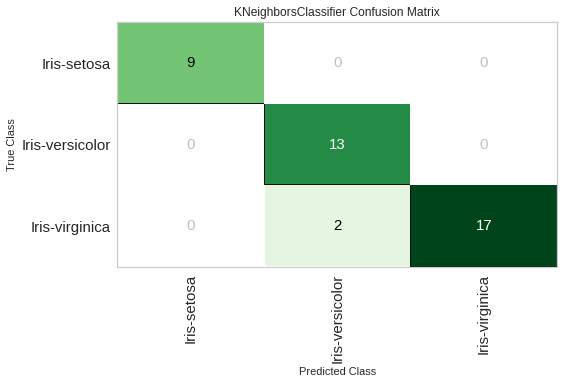

In [ ]:
# Carregando os plots do PyCaret
# Selecionando a matrix de cconfusão (exemplo: transação é uma fraude ou não uma fraude)
from pycaret.classification import plot_model
plot_model(knn_tuning, plot = 'confusion_matrix')

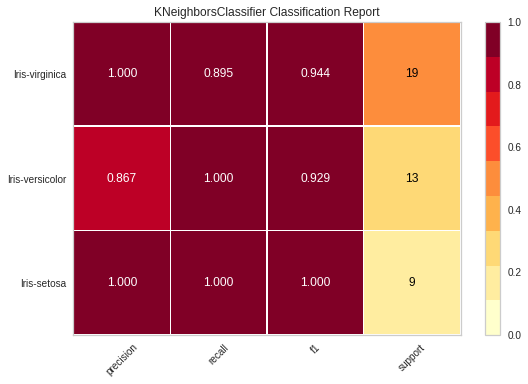

In [ ]:
# Calculos para Precisão e Recall
# https://www.youtube.com/watch?v=fC_C695yVOk
plot_model(knn_tuning, plot = 'class_report')

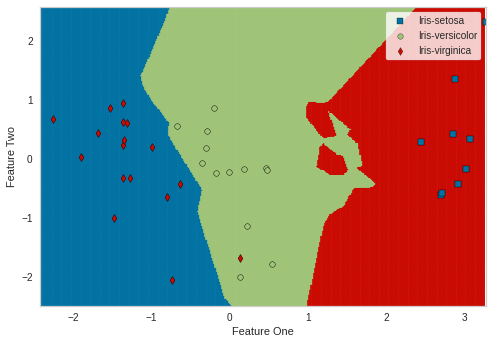

In [ ]:
plot_model(knn_tuning, plot='boundary')

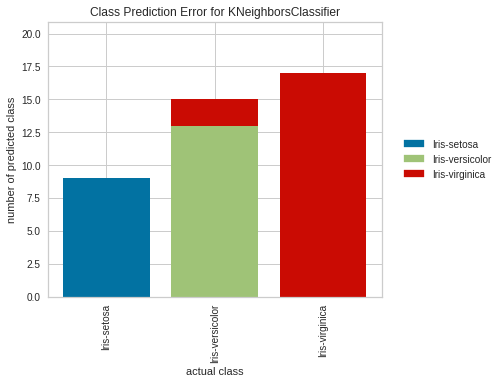

In [ ]:
plot_model(knn_tuning, plot = 'error')

In [ ]:
from pycaret.classification import evaluate_model
evaluate_model(knn_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Previsões com o modelo

In [75]:
from pycaret.classification import predict_model
predict_model(knn_tuning);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9512,0.9643,0.9649,0.9577,0.9516,0.9242,0.9277


In [ ]:
from pycaret.classification import finalize_model
knn_final = finalize_model(knn_tuning)
print(knn_final)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


In [76]:
from pycaret.classification import save_model
save_model(knn_final,'knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

In [ ]:
from pycaret.classification import load_model
knn_carregado = load_model('/content/knn')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
previsoes = predict_model(knn_carregado, data=base_teste)
previsoes

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.8889,0,0,0,0,0


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,1.0
25,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa,1.0
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor,1.0
68,6.2,2.2,4.5,1.5,Iris-versicolor,Iris-versicolor,1.0
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,1.0
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-virginica,1.0
79,5.7,2.6,3.5,1.0,Iris-versicolor,Iris-versicolor,1.0
96,5.7,2.9,4.2,1.3,Iris-versicolor,Iris-versicolor,1.0
101,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,1.0


In [ ]:
# creating a predict function to be passed into gradio UI
#def predict(model, sepal_length, sepal_width, petal_length, petal_width):
  
#    df = pd.DataFrame.from_dict({'sepal_length': [sepal_length], 'sepal_width': [sepal_width], 
#                                 'petal_length': [petal_length], 'petal_width': [petal_width]})
#    
#    model_index = list(compare_model_results['Model']).index(model)
#    model = best[model_index]
#    pred = predict_model(model, df, raw_score=True)
#    return {'Iris-setosa': pred['Score_Iris-setosa'][0].astype('float64'), 
#            'Iris-versicolor': pred['Score_Iris-versicolor'][0].astype('float64'),
#            'Iris-virginica' : pred['Score_Iris-virginica'][0].astype('float64')}

In [ ]:
# (não consegui ainda) import gradio as gr

In [ ]:
#model = gr.inputs.Dropdown(list(compare_model_results['Model']), label="Model")
#sepal_length = gr.inputs.Slider(minimum=1, maximum=10, default=data['sepal_length'].mean(), label = 'sepal_length')
#sepal_width = gr.inputs.Slider(minimum=1, maximum=10, default=data['sepal_width'].mean(), label = 'sepal_width')
#petal_length = gr.inputs.Slider(minimum=1, maximum=10, default=data['petal_length'].mean(), label = 'petal_length')
#petal_width = gr.inputs.Slider(minimum=1, maximum=10, default=data['petal_width'].mean(), label = 'petal_width')

#gr.Interface(predict, [model,sepal_length,sepal_width,petal_length,petal_width], "label", live=True).launch()
